<a href="https://colab.research.google.com/github/Sleepytt1210/digital-image-processing/blob/main/histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Informatics - Lab 4

## Histograms & Histogram Processing

**Tasks:**

1.   Plot the histograms of each of the R, G and B colour channels from an image. Plot each in it corresponding colour and overlay them as a single image
2.   Perform histogram equalization on each of the
R, G and B colour channels from an image.



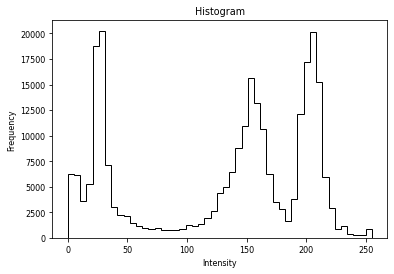

In [ ]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

im = data.camera()
v = np.concatenate(im)
bins = np.linspace(0, 255, 50)
p = plt.hist(v, bins, color='k', histtype='step')
t = plt.title("Histogram")
t = plt.xlabel('Intensity')
t = plt.ylabel('Frequency')

In [ ]:
from skimage.color import rgb2hsv

def equalise(image, nbins=256):
  v = image.flatten()
  res = np.zeros(image.shape, np.int16)
  if len(image.shape) == 3:
    v = np.reshape(image, (-1, image.shape[-1]))
    for chn in range(image.shape[-1]):
      hist, bin_edges = np.histogram(v[..., chn], nbins)
      eqlchn = eql(image[..., chn], hist, nbins, bin_edges)
      res[..., chn] = eqlchn
  else:
    hist, bin_edges = np.histogram(v, nbins)
    cdf = hist.cumsum()
    res = eql(image, hist, nbins, bin_edges)
  
  return res

def eql(image, hist, nbins, bin_edges):
  immin = np.min(image)
  immax = np.max(image)
  res = np.zeros(image.shape, np.float64)
  nml = False
  # Normalised
  if immin < 0:
    image -= immin

  cdf = hist.cumsum()
  cdf = cdf / float(cdf[-1])

  bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.

  out = np.interp(image.flat, bin_centers, cdf)

  # fig, (ax1, ax2) = plt.subplots(1, 2)

  # ax1.plot(bin_centers, cdf)
  # ax1.set_title("Fp to Xp")

  # ax2.scatter(image.flat, out)
  # ax2.set_title("Polated images")

  return out.reshape(image.shape)
  # N = image.flatten().shape[0]
  # L = len(cdf)
  # for i in range(image.shape[0]):
  #   for j in range(image.shape[1]):
  #     res[i][j] = max(0, (L/N) * (cdf[image[i][j]]-1))
  # if nml:
  #   res = res.astype(np.float64)/max(255, np.max(res))
  # return res

def constant_stretch(image, pct):
  v = image.flatten()
  res = np.zeros(image.shape, np.float64)
  c, d = np.percentile(v, (pct, 100-pct))
  if len(image.shape) == 3:
    v = np.reshape(image, (-1, image.shape[-1]))
    for chn in range(image.shape[-1]):
      res[..., chn] = rescale(v[..., chn], c, d)
  else:
    res = rescale(image, c, d)

  return res

def rescale(image, c, d):
  a = 0
  b = 1 if (image.dtype.type != np.float64 or image.dtype.type != np.float32) and np.max(image) <= 1 else 255
  im = np.array(image)
  for i in range(im.shape[0]):
    for j in range(im.shape[1]):
      im[i][j] = min(b, max(a, (image[i][j] - c) * ((b-a)/(d-c)) + a))

  return im

  
def plot_hist(image, nbins, axes):
  non3 = len(image.shape) < 3
  
  v = image.flatten() if (non3) else np.reshape(image, (-1, image.shape[-1]))
  ax_img, ax_hist = axes
  ax_img.imshow(image, cmap="gray")

  immin = np.min(image)
  immax = np.max(image)

  nml = (immin >= 0 and immax <= 1)
  bins = np.linspace(0, 1 if nml else 255, nbins)

  if non3:
    ax_hist.hist(v, bins, color='k', histtype='step')
  else:
    ax_hist.hist(v, bins, color=['r', 'g', 'b'], histtype='step')
  
  ax_hist.set_xlabel('Intensity')
  ax_hist.set_ylabel('Frequency')

  return ax_img, ax_hist

# Non colour image processing

Text(0.5, 1.0, 'Equalised Cameraman 2')

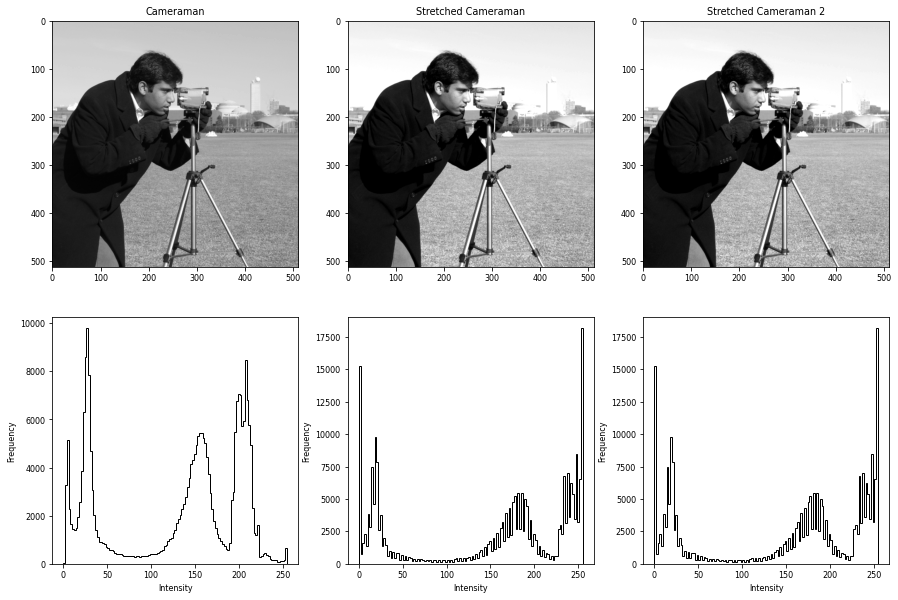

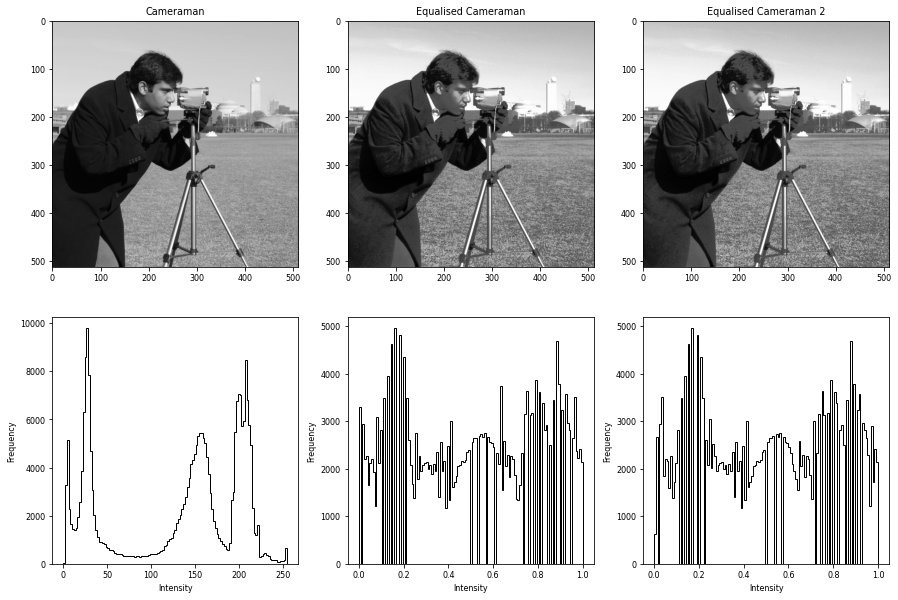

In [ ]:
cam = data.camera()
c2 = equalise(cam)
c3 = exposure.equalize_hist(cam)

pct = 5
pd, pc = np.percentile(cam, (pct, 100-pct))
cs2 = constant_stretch(cam, pct)
cs3 = exposure.rescale_intensity(cam, in_range=(pd, pc))

# Constant Strecth
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

ax_img, ax_hist = plot_hist(cam, 128, axes[:, 0])
ax_img.set_title("Cameraman")

ax_img, ax_hist = plot_hist(cs2, 128, axes[:, 1])
ax_img.set_title("Stretched Cameraman")

ax_img, ax_hist = plot_hist(cs3, 128, axes[:, 2])
ax_img.set_title("Stretched Cameraman 2")

# Equalisation
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

ax_img, ax_hist = plot_hist(cam, 128, axes[:, 0])
ax_img.set_title("Cameraman")

ax_img, ax_hist = plot_hist(c2, 128, axes[:, 1])
ax_img.set_title("Equalised Cameraman")

ax_img, ax_hist = plot_hist(c3, 128, axes[:, 2])
ax_img.set_title("Equalised Cameraman 2")

## Colour Image Processing

**Tasks:**

1.   Separate out objects in the scene of a particular Hue value. Add these back as a colour overlay onto the original image in grayscale as per the example of the rose (Hue = Red).
2.   Perform Histogram Equalization on the V
channel of an HSV version of a RGB colour image before converting back to RGB for display.
Compare this to just performing Histogram Equalization on each channel of the RGB
version of he image. Display both version in different windows. The difference in result is also apparent for all contrast enhancement and manipulation approaches.



/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


Text(0.5, 1.0, 'HSV Equalised')

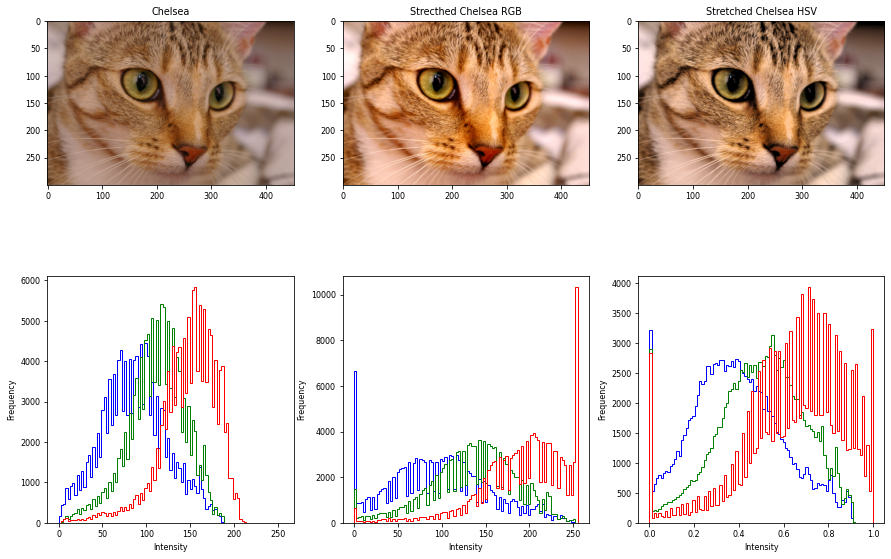

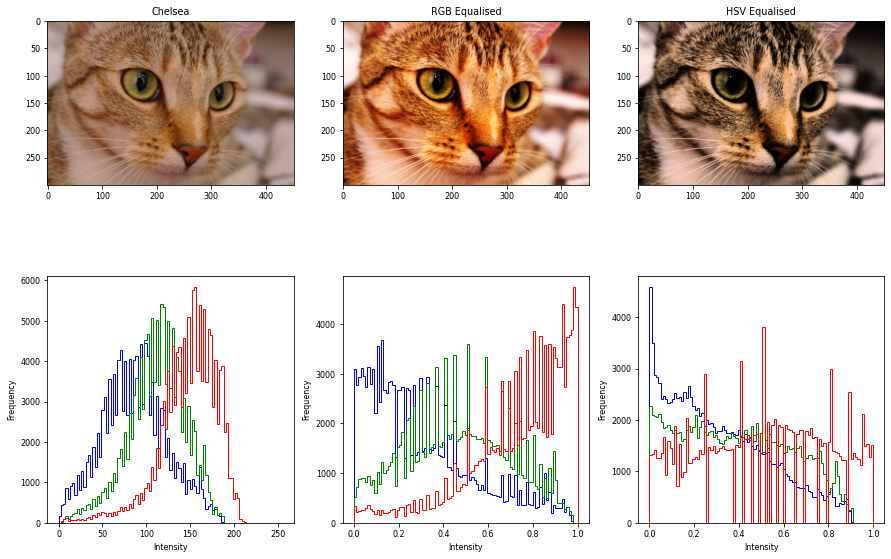

In [ ]:
from skimage import data
from skimage.color import rgb2hsv, hsv2rgb
import matplotlib.pyplot as plt

im = data.chelsea()
im_hsv = rgb2hsv(im)
im_hsv_h = im_hsv[:,:,0]
im_hsv_s = im_hsv[:,:,1]
im_hsv_v = im_hsv[:,:,2]

nbins = 100

# Constant Stretch
pct = 2
pc, pd = np.percentile(im, (pct, 100-pct))
str_rgb = exposure.rescale_intensity(im, in_range=(pc, pd))

## HSV
str_hsv = np.array(im_hsv)
pc, pd = np.percentile(im_hsv_v, (pct, 100-pct))
str_hsv[:,:,2] = constant_stretch(im_hsv_v, pct)
str_hsved = hsv2rgb(str_hsv)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

ax_img, ax_hist = plot_hist(im, nbins, axes[:, 0])
ax_img.set_title("Chelsea")

ax_img, ax_hist = plot_hist(str_rgb, nbins, axes[:, 1])
ax_img.set_title("Strecthed Chelsea RGB")

ax_img, ax_hist = plot_hist(str_hsved, nbins, axes[:, 2])
ax_img.set_title("Stretched Chelsea HSV")

# Equalisation
rgb_eql = exposure.equalize_hist(im)

ceql_hsv = np.array(im_hsv)
ceql_hsv[:,:,2] = exposure.equalize_hist(im_hsv_v)
ceql_rgb = hsv2rgb(ceql_hsv)
value = equalise(im_hsv_v)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

ax_img, ax_hist = plot_hist(im, nbins, axes[:, 0])
ax_img.set_title("Chelsea")

ax_img, ax_hist = plot_hist(rgb_eql, nbins, axes[:, 1])
ax_img.set_title("RGB Equalised")

ax_img, ax_hist = plot_hist(ceql_rgb, nbins, axes[:, 2])
ax_img.set_title("HSV Equalised")
